Step 1: I downloaded an excel file from •	Worldwide Covid-19 Cases: https://www.kaggle.com/imdevskp/corona-virus-report

Step 2: Perform data preparation and Cleaning

In [228]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

•	Load the dataset into a data frame using Pandas

In [229]:
from google.colab import files
uploaded = files.upload()

Saving F_Project.csv to F_Project (1).csv


In [230]:
project = pd.read_csv('F_Project.csv')

project.columns = ['Province', 'Country', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'Region']
project.head()

,Province,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Region
0,NaN,Afghanistan,33.93911,67.709953,4/1/2020,237,4,5,228,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,4/1/2020,259,15,67,177,Europe
2,NaN,Algeria,28.03390,1.659600,4/1/2020,847,58,61,728,Africa
3,NaN,Andorra,42.50630,1.521800,4/1/2020,390,14,10,366,Europe
4,NaN,Angola,-11.20270,17.873900,4/1/2020,8,2,1,5,Africa


•	Explore the number of rows & columns, ranges of values etc.

In [231]:
#number of rows and columns
print(project.shape)

print()
#Range of values
print(project.info())

(30798, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30798 entries, 0 to 30797
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Province   9204 non-null   object 
 1   Country    30798 non-null  object 
 2   Lat        30798 non-null  float64
 3   Long       30798 non-null  float64
 4   Date       30798 non-null  object 
 5   Confirmed  30798 non-null  int64  
 6   Deaths     30798 non-null  int64  
 7   Recovered  30798 non-null  int64  
 8   Active     30798 non-null  int64  
 9   Region     30798 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 2.3+ MB
None


•	Handle missing, incorrect and invalid data

1.   I will remove three columns (province, lat and long columns) because they are irrelevant for my analysis.



In [232]:
#Check for missing values
missing_values = project.isnull().sum()
print(missing_values)
print()
#Drop the three columns because they are inconsequential to my analysis and print the new dataframe
project = project.drop(columns=['Province', 'Lat', 'Long'])
print(project)
print()

Province     21594
Country          0
Lat              0
Long             0
Date             0
Confirmed        0
Deaths           0
Recovered        0
Active           0
Region           0
dtype: int64

                     Country       Date  Confirmed  Deaths  Recovered  Active  \
0                Afghanistan   4/1/2020        237       4          5     228   
1                    Albania   4/1/2020        259      15         67     177   
2                    Algeria   4/1/2020        847      58         61     728   
3                    Andorra   4/1/2020        390      14         10     366   
4                     Angola   4/1/2020          8       2          1       5   
...                      ...        ...        ...     ...        ...     ...   
30793  Sao Tome and Principe  7/27/2020        865      14        734     117   
30794                  Yemen  7/27/2020       1691     483        833     375   
30795                Comoros  7/27/2020        354       7        3

In [233]:
# Check if the columns (Confirmed, Deaths, Recovered, and Active) have any negative values since that is physically impossible
invalid_confirmed = project.query('Confirmed < 0').shape[0]
invalid_deaths = project.query('Deaths < 0').shape[0]
invalid_recovered = project.query('Recovered < 0').shape[0]
invalid_active = project.query('Active < 0').shape[0]
print(invalid_confirmed)
print(invalid_deaths)
print(invalid_recovered)
print(invalid_active)
#The result showed that 'Active' column has negative values so I removed rows with negative active cases
project = project[project['Active'] >= 0]
#Confirming there are no more negative values
print()
invalid_active = project.query('Active < 0').shape[0]
print(invalid_active)

0
0
0
10

0


•	Perform any additional steps (parsing dates, creating additional columns, merging multiple datasets etc.)

In [238]:
#Creating additional columns to find the mortality rate of covid 19
project['Mortality_Rate'] = (project['Deaths'] / project['Confirmed'])
#Creating additional columns to find the recovery rate of covid 19
project['Recovery_Rate'] = (project['Recovered']/ project['Confirmed'])
#Round off to 2 decimal places
project[['Mortality_Rate', 'Recovery_Rate']] = project[['Mortality_Rate', 'Recovery_Rate']].round(2)
print(project)

                     Country       Date  Confirmed  Deaths  Recovered  Active  \
0                Afghanistan   4/1/2020        237       4          5     228   
1                    Albania   4/1/2020        259      15         67     177   
2                    Algeria   4/1/2020        847      58         61     728   
3                    Andorra   4/1/2020        390      14         10     366   
4                     Angola   4/1/2020          8       2          1       5   
...                      ...        ...        ...     ...        ...     ...   
30793  Sao Tome and Principe  7/27/2020        865      14        734     117   
30794                  Yemen  7/27/2020       1691     483        833     375   
30795                Comoros  7/27/2020        354       7        328      19   
30796             Tajikistan  7/27/2020       7235      60       6028    1147   
30797                Lesotho  7/27/2020        505      12        128     365   

                      Regio

Step 3: Perform exploratory analysis & visualization (7 marks)

•	Compute the mean, sum, range and other interesting statistics for numeric columns

In [239]:
print((project.describe()).round(2))
print()

# print the sum of the numeric columns in million
column_numeric = project.select_dtypes(include=['number'])
print((column_numeric.sum())/1000000)

        Confirmed     Deaths   Recovered      Active  Mortality_Rate  \
count    30788.00   30788.00    30788.00    30788.00        30658.00   
mean     26562.25    1394.67    12517.68    12649.89            0.03   
std     159871.23    7922.86    68747.91    95934.31            0.04   
min          0.00       0.00        0.00        0.00            0.00   
25%        132.00       2.00       22.00        8.00            0.01   
50%        784.50      11.00      276.00      199.00            0.02   
75%       5296.25     113.00     1722.25     1993.00            0.04   
max    4290259.00  148011.00  1846641.00  2816444.00            0.33   

       Recovery_Rate  
count       30658.00  
mean            0.55  
std             0.35  
min             0.00  
25%             0.22  
50%             0.57  
75%             0.90  
max             1.00  

Confirmed         817.798462
Deaths             42.939214
Recovered         385.394372
Active            389.464876
Mortality_Rate      0.00096

•	Explore distributions of numeric columns using histograms etc.

<ipython-input-240-dd8b86a3dc7c>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  project[['Confirmed', 'Deaths','Recovered','Active','Mortality_Rate', 'Recovery_Rate']].hist(ax=axes[1,0])


array([[<Axes: title={'center': 'Confirmed'}>,
        <Axes: title={'center': 'Deaths'}>],
       [<Axes: title={'center': 'Recovered'}>,
        <Axes: title={'center': 'Active'}>],
       [<Axes: title={'center': 'Mortality_Rate'}>,
        <Axes: title={'center': 'Recovery_Rate'}>]], dtype=object)

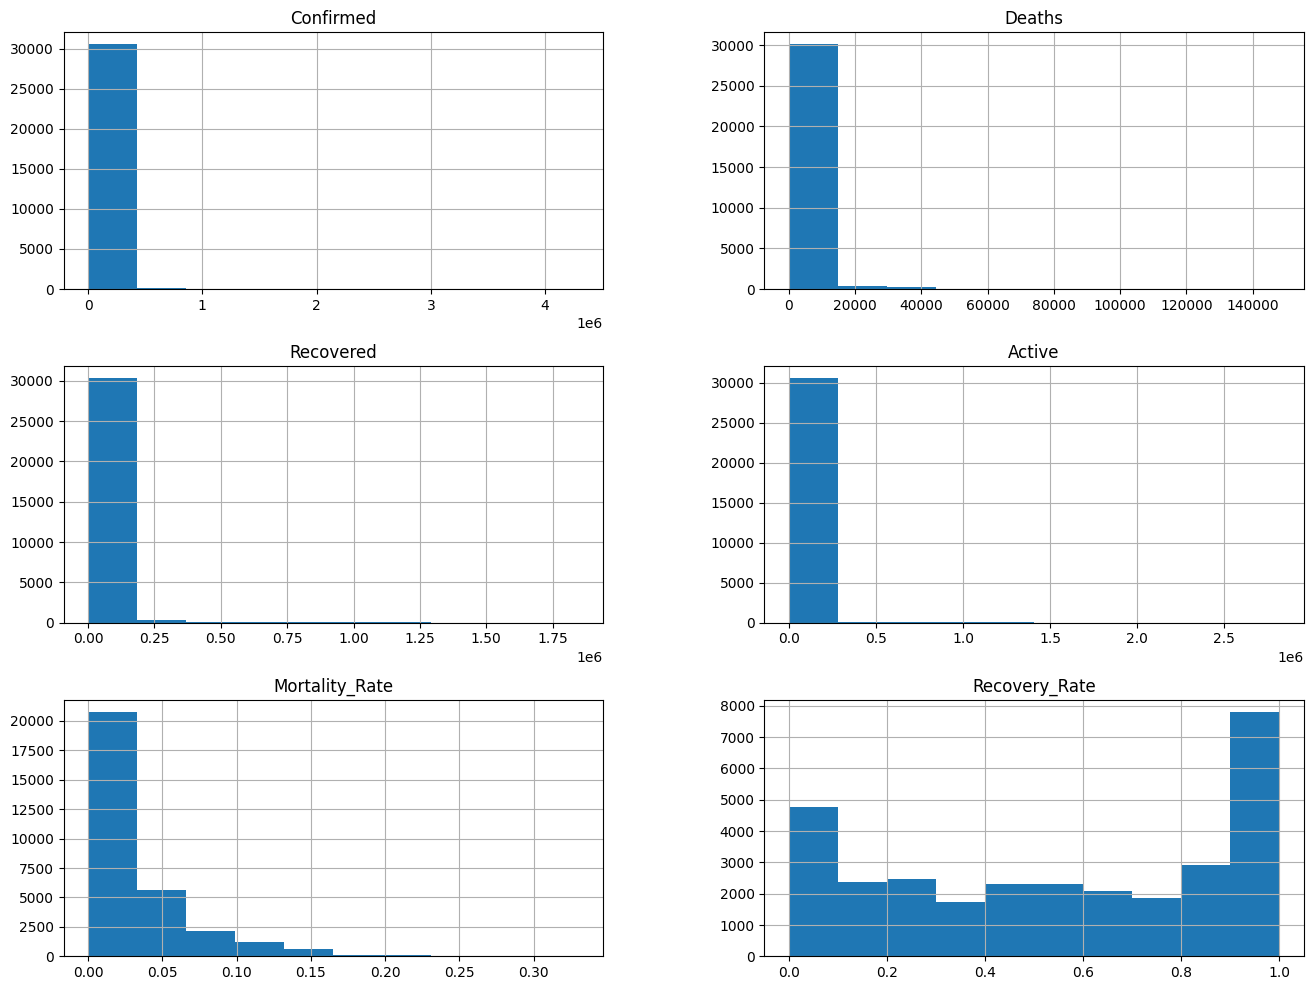

In [240]:
# create histograms for selected columns with custom figure size and layout
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,12))
project[['Confirmed', 'Deaths','Recovered','Active','Mortality_Rate', 'Recovery_Rate']].hist(ax=axes[1,0])

•	Explore relationship between columns using scatter plots, bar charts etc.

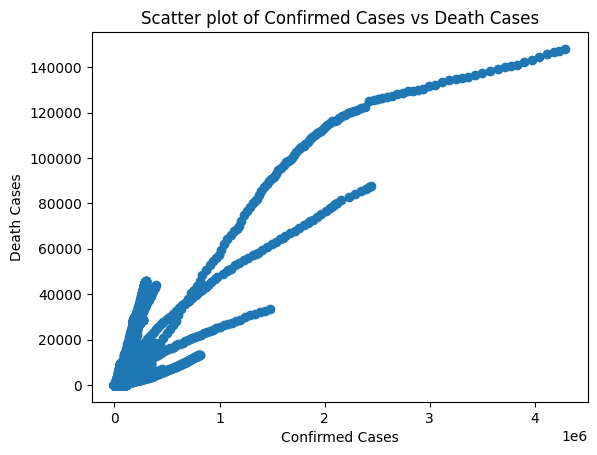

In [241]:
#Scatter plots to show the correlation betweeen confirmed and Death cases
plt.scatter(project['Confirmed'], project['Deaths'])
plt.title('Scatter plot of Confirmed Cases vs Death Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Death Cases')
plt.show()

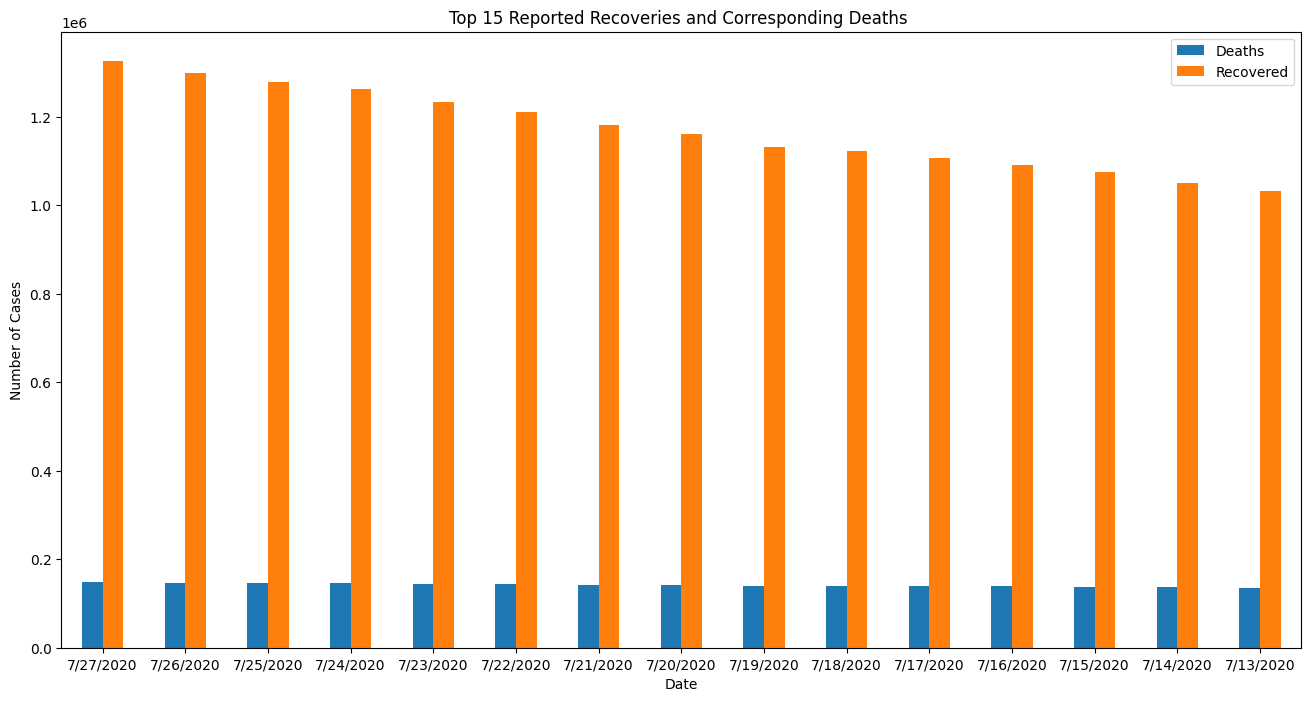

In [242]:
top10 = project.nlargest(15, 'Deaths')

ax = top10.plot.bar(x='Date', y=['Deaths', 'Recovered'], rot=0, figsize=(16, 8))
ax.set_xlabel('Date')
ax.set_ylabel('Number of Cases')
ax.set_title('Top 15 Reported Recoveries and Corresponding Deaths ')
plt.show()


•	Make a note of interesting insights from the exploratory analysis

1.   Between April 1st and July 27th 2020, a total of about 818 million confirmed cases of Covid19 infections were reported. Correspondingly, about 43 million people died while 385 million recovered within this period. 
2.   The single highest reported death rate from the infection was 33% of the confirmed cases while there were situations where all confirmed cases recovered from the virus.
3.   From the scatter plots, cases of death increase with increasing confirmed cases.
4.   From the bar chart, Most recoveries occurred in july 2020 with the corresponding death rate remaining steady.





Step 4: Ask & answer questions about the data (11 marks)

<ipython-input-243-095ff9a42e8d>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_R = project.groupby(['Region']).sum()


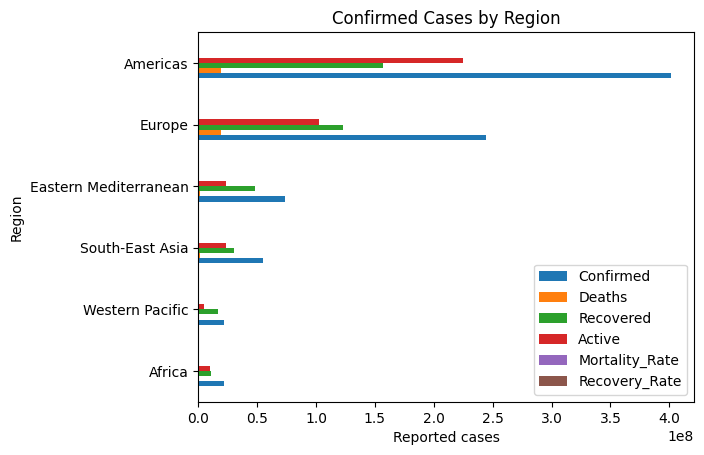

In [243]:
#Question 1: Which region had the highest number of confirmed cases of Covid19
#Question 2: Which region reported the most deaths
#Question 3: Which region reported the most recoveries

#Answer to these questions can be obtained by using the groupby function and plotting the outcome in a column chart
grouped_R = project.groupby(['Region']).sum()
grouped_R.sort_values('Confirmed', inplace=True)
grouped_R.plot(kind='barh')
plt.title('Confirmed Cases by Region')
plt.xlabel('Reported cases')
plt.ylabel('Region')

plt.show()

<ipython-input-244-08108e83c321>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_C = project.groupby(['Country']).sum()


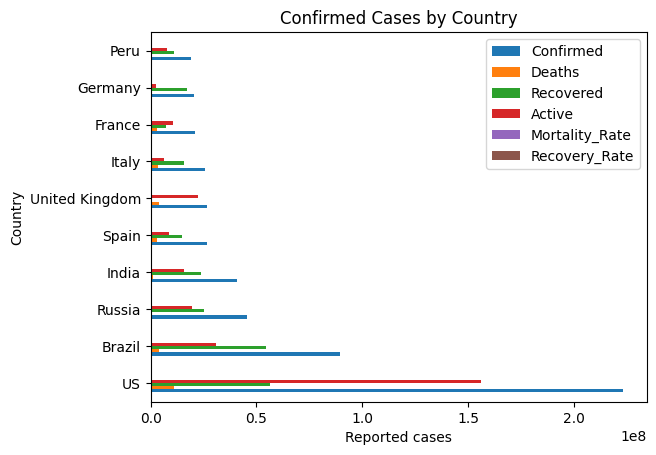

In [244]:
#Question 4: Which Country had the highest number of confirmed cases of Covid19
#Question 5: Which Country reported the most deaths
#Question 6: Which Country reported the most recoveries

#Answer to these questions can be obtained by using the groupby function and plotting the outcome in a column chart

grouped_C = project.groupby(['Country']).sum()
top10 = grouped_C.nlargest(10, 'Confirmed')

#grouped_C.sort_values('Confirmed', inplace=True)
#grouped_C.plot(kind='barh')
top10.plot(kind='barh')
plt.title('Confirmed Cases by Country')
plt.xlabel('Reported cases')
plt.ylabel('Country')

# show plot
plt.show()

Step 5: Summarize your inferences & write a conclusion (5 marks)
•	Write a summary of what you have learned from the analysis
•	Include interesting insights and graphs from previous sections

Summary and Conclusion
1. Globally, the recovery rate from Covid19 was substantially higher than the mortality rate going by the histograms.
2. In the confirmed cases by Region Column chart, Europe had similar death cases with Americas despite the fact that the confirmed cases in Americas were significantly higher than in Europe. However, the recoveries in Americas were not commesurably larger than in Europe if the ratio between confirmed cases in both regions was taken into consideration
3. The reported deaths in the UK was higher than in Brazil even if as we know, Brazil has a population of 214.3 million people while the UK has 67.33 million
4. The US dominated the chart in every metric considered in the Confirmed Cases by Country Column Chart.
5. No African country appeared amongst the top 10 despite being classified as a developing or underdeveloped region.
6. It was surprising that China didn't appear amongst the top 10 conaidering its population size and the fact that Covid19 as we know, was first reported in China.
7. India with over a billion people came at 4th position in terms of confirmed casesand the reported deaths were nothing compared to countries like France that had about half the number of confirmed cases in India.
8. Overall, from april 1st to July 27th 2020, Covid19 was more devastating in developed countries than in contries that were expected to suffermore because of factors such as living standards and low infrastructure to maintian high hygiene standards.
9. It is worthy of mention that possibly, the developed world sufered more because data in other regions were either suppressed or underreported
10. Finally, I think inestigations should be carried out as to why the US dominated the charts by a mile.